In [1]:
# Cell 1: Ensure project root is on Python path
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))  # Adds project-root to path

# Import everything from our module
from src.correlation_analysis import (
    load_and_prepare_data,
    perform_sentiment_analysis,
    calculate_stock_returns,
    align_data,
    calculate_correlation,
    plot_correlation
)

# Also import pandas for displaying DataFrames
import pandas as pd

# Define file paths (relative to notebooks/ directory)
news_file  = '../data/fnspid_news_cleaned_2020.csv'
stock_file = '../data/stock_prices_cleaned_2020.csv'


In [2]:
# Cell 2: Load and prepare data
news_df, stock_df = load_and_prepare_data(news_file, stock_file)

print("=== News Data Sample ===")
display(news_df.head())

print("\n=== Stock Data Sample ===")
display(stock_df.head())


=== News Data Sample ===


,Unnamed: 0,headline,url,publisher,date,stock,publisher_domain,date_only,Date
0,0,Stocks That Hit 52Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,Benzinga Insights,2020-06-05,2020-06-05
1,1,Stocks That Hit 52Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,Benzinga Insights,2020-06-03,2020-06-03
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,Lisa Levin,2020-05-26,2020-05-26
3,3,46 Stocks Moving In Fridays MidDay Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,Lisa Levin,2020-05-22,2020-05-22
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,Vick Meyer,2020-05-22,2020-05-22



=== Stock Data Sample ===


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock,date_only
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400,0.0,0.0,AAPL,2020-01-02
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167595,146322800,0.0,0.0,AAPL,2020-01-03
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742661,118387200,0.0,0.0,AAPL,2020-01-06
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000,0.0,0.0,AAPL,2020-01-07
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565208,132079200,0.0,0.0,AAPL,2020-01-08


In [3]:
# Cell 3: Perform sentiment analysis on news headlines
news_df_with_sentiment, daily_sentiment = perform_sentiment_analysis(news_df)

print("=== News Data with Sentiment & Tone ===")
display(news_df_with_sentiment[['Date', 'headline' if 'headline' in news_df_with_sentiment.columns else 'title', 
                                'Sentiment', 'Tone']].head())

print("\n=== Daily Sentiment Sample ===")
display(daily_sentiment.head())


=== News Data with Sentiment & Tone ===


,Date,headline,Sentiment,Tone
0,2020-06-05,Stocks That Hit 52Week Highs On Friday,0.0,neutral
1,2020-06-03,Stocks That Hit 52Week Highs On Wednesday,0.0,neutral
2,2020-05-26,71 Biggest Movers From Friday,0.0,neutral
3,2020-05-22,46 Stocks Moving In Fridays MidDay Session,0.0,neutral
4,2020-05-22,B of A Securities Maintains Neutral on Agilent...,0.0,neutral



=== Daily Sentiment Sample ===


,Date,Sentiment,Tone
0,2020-01-01,-0.016991,neutral
1,2020-01-02,0.056789,neutral
2,2020-01-03,0.067208,neutral
3,2020-01-04,0.250000,neutral
4,2020-01-05,0.500000,positive


In [4]:
# Cell 4: Compute daily stock returns
stock_df_with_returns = calculate_stock_returns(stock_df)

print("=== Stock Data with Returns ===")
display(stock_df_with_returns[['Date', 'Close', 'Returns']].head())


=== Stock Data with Returns ===


,Date,Close,Returns
0,2020-01-03,74.357498,-0.972204
1,2020-01-06,74.949997,0.796825
2,2020-01-07,74.597504,-0.470305
3,2020-01-08,75.797501,1.608629
4,2020-01-09,77.407501,2.124081


In [5]:
# Cell 5: Merge daily sentiment and stock returns on 'Date'
aligned_df = align_data(daily_sentiment, stock_df_with_returns)

print("=== Aligned Data (Sentiment + Returns) ===")
display(aligned_df.head())


=== Aligned Data (Sentiment + Returns) ===


,Date,Sentiment,Tone,Returns
0,2020-01-03,0.067208,neutral,-0.972204
1,2020-01-06,0.071601,neutral,0.796825
2,2020-01-07,0.084342,neutral,-0.470305
3,2020-01-08,0.065430,neutral,1.608629
4,2020-01-09,0.008666,neutral,2.124081


In [6]:
# Cell 6: Compute direct correlation (lag = 0)
r_direct, p_direct = calculate_correlation(aligned_df, lag=0)
print(f"Direct Correlation (lag=0): r = {r_direct:.4f}, p-value = {p_direct:.4f}")

# Also compute lagged correlations (1, 2, 3 days)
for lag in [1, 2, 3]:
    r_lag, p_lag = calculate_correlation(aligned_df, lag=lag)
    print(f"Lagged Correlation (lag={lag}): r = {r_lag:.4f}, p-value = {p_lag:.4f}")


Direct Correlation (lag=0): r = 0.3419, p-value = 0.0002
Lagged Correlation (lag=1): r = -0.0699, p-value = 0.4681
Lagged Correlation (lag=2): r = 0.0992, p-value = 0.3050
Lagged Correlation (lag=3): r = 0.1454, p-value = 0.1331


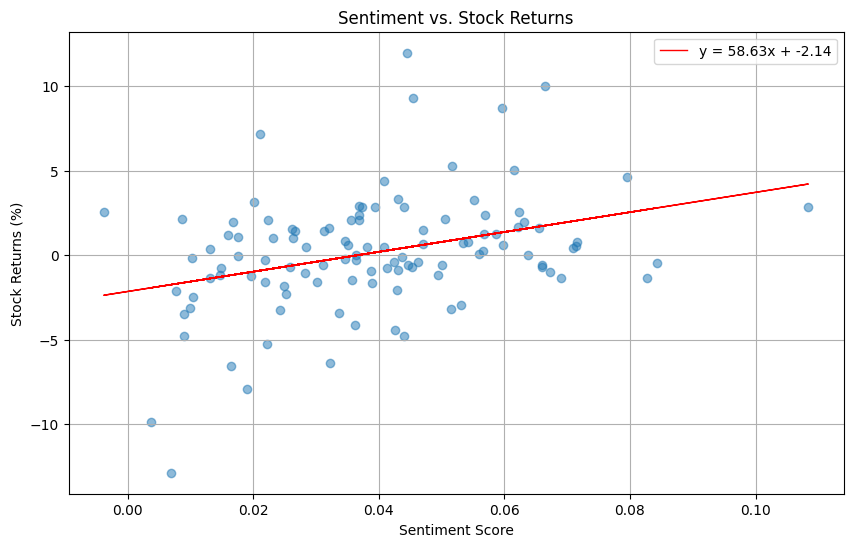

In [7]:
# Cell 7: Scatter plot of sentiment vs. returns
plot_correlation(aligned_df)


In [52]:
# Cell 8: Save aligned DataFrame for future reference
aligned_df.to_csv('../data/sentiment_returns_2020.csv', index=False)
print("Saved aligned sentiment-returns data to '../data/sentiment_returns_2020.csv'")


Saved aligned sentiment-returns data to '../data/sentiment_returns_2020.csv'



Results saved to '../data/sentiment_returns_2020.csv'
